## Swarm data - Thermosphere Neutral Density

#### Following are the external libraries used in the project

In [8]:
import os
os.environ["CDF_LIB"] = "C:/Users/jose_ne/Downloads/cdf3.8.0_64bit_VS2015/lib"
from spacepy import pycdf
import pandas as pd

In [15]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ------------ -------------------------- 81.9/250.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install cdflib matplotlib basemap


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib cartopy


Note: you may need to restart the kernel to use updated packages.


In [21]:
conda install -c conda-forge cartopy


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0




##### Check what parameters and meta data are provided in the data set. Are there any quality flags?

In [6]:
#open the CDF file
cdf_file = pycdf.CDF(r'C:\Users\jose_ne\Downloads\THERMOSPHERE\SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')

#Create an empty dataframe
df = pd.DataFrame()

#Load variables and their values into the DataFrame
for var_name in cdf_file:
    cdf_var = cdf_file[var_name]
    df[var_name] = cdf_var[:]
    

#List global attributes (metadata)
global_attributes = {attr_name: [cdf_file.attrs[attr_name]] for attr_name in cdf_file.attrs}
global_df = pd.DataFrame(global_attributes)

#Check for quality flags
quality_flags = {}
for var_name in cdf_file:
    cdf_var = cdf_file[var_name]
    for var_attr_name in cdf_var.attrs:
        if 'flag' in var_attr_name.lower():
            if var_name not in quality_flags:
                quality_flags[var_name] = {}
            quality_flags[var_name][var_attr_name] = [cdf_var.attrs[var_attr_name]]
            
            
#Create a DataFrame for quality flags
flag_dfs = {var_name: pd.DataFrame(flags) for var_name, flags in quality_flags.items()}

#Display DataFrames
print("Variables and Values:")
print(df)
df.to_excel('Swarmdata2.xlsx', index=True)

print("\nGlobal Attributes (Metadata):")
print(global_df)

if flag_dfs:
    print("\nQuality Flags:")
    for var_name, flag_df in flag_dfs.items():
        print(f"Variable: {var_name}")
        print(flag_df)
        
        
#Close the CDF file
cdf_file.close()

Variables and Values:
                    time       density       altitude   latitude  longitude  \
0    2014-02-01 00:00:00  5.184454e-13  494739.849495  -6.712439 -54.571835   
1    2014-02-01 00:00:10  5.173494e-13  494892.962741  -7.350848 -54.586020   
2    2014-02-01 00:00:20  5.178510e-13  495050.712763  -7.989212 -54.600126   
3    2014-02-01 00:00:30  5.099569e-13  495213.057146  -8.627530 -54.614148   
4    2014-02-01 00:00:40  5.106715e-13  495379.955465  -9.265799 -54.628078   
...                  ...           ...            ...        ...        ...   
8635 2014-02-01 23:59:10  4.885602e-13  524038.760554 -85.329056 -24.516611   
8636 2014-02-01 23:59:20  4.819704e-13  524110.934032 -85.852045 -20.006840   
8637 2014-02-01 23:59:30  4.785112e-13  524177.630182 -86.341594 -14.236125   
8638 2014-02-01 23:59:40  4.822021e-13  524238.832750 -86.782416  -6.778956   
8639 2014-02-01 23:59:50  4.767876e-13  524294.528001 -87.151808   2.826676   

      local_solar_time  
0   

##### Generate a global map and plot the latitude-longitude locations of the observed data points.

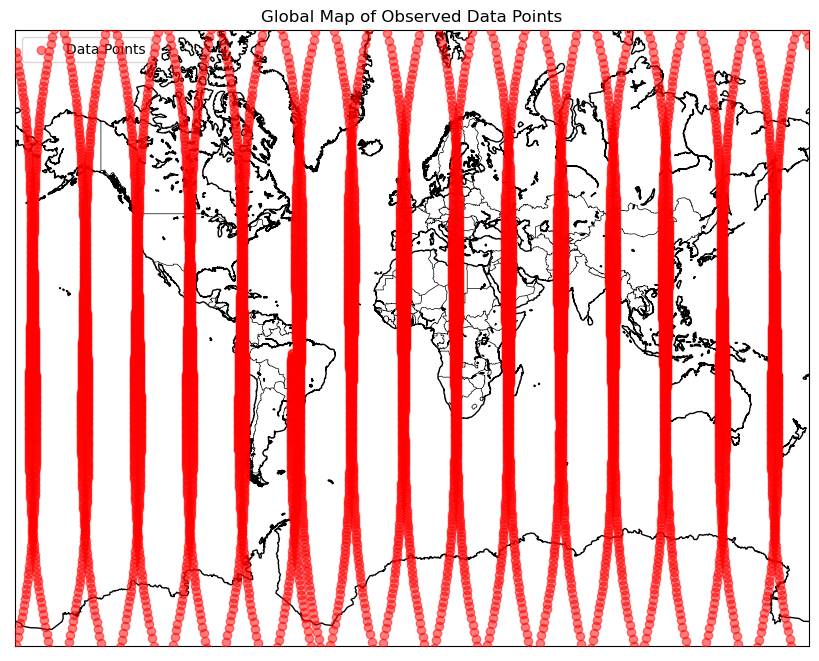

In [63]:
import cdflib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Extract latitude and longitude data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')

# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Plot the data points
x, y = m(longitude, latitude)
m.scatter(x, y, marker='o', color='red',alpha=0.5, zorder=10, label='Data Points')

# Customize the plot (title, legend, etc.)
plt.title('Global Map of Observed Data Points')
plt.legend(loc='best')
plt.show()






##### Add the orbit altitude as color information to the plot. Use a colorbar or color limits from 480– 500 km

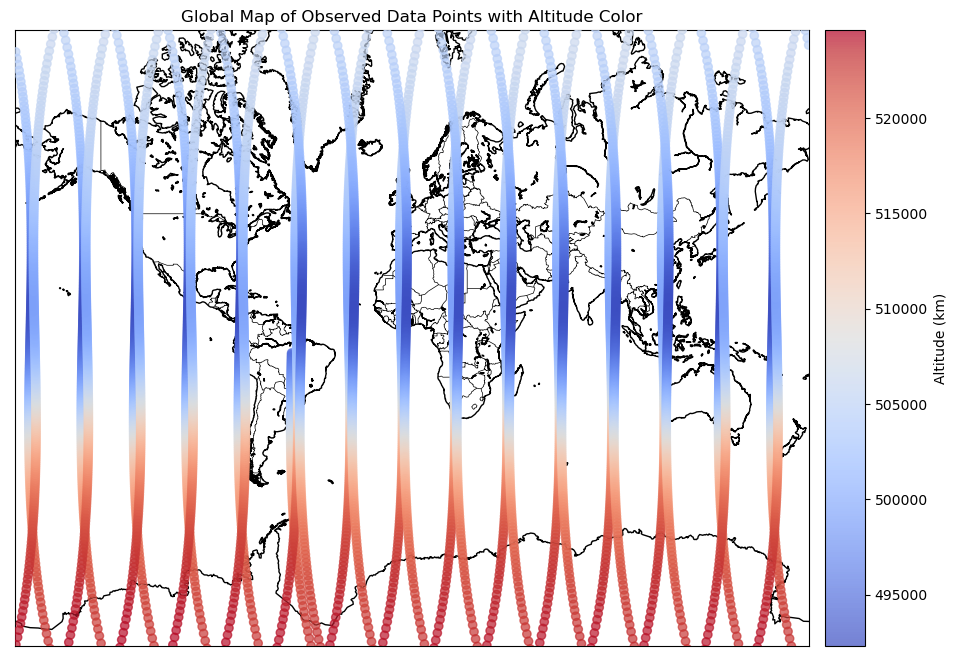

In [60]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)


# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and altitude data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')
altitude = cdf.varget('altitude')  

# Define color limits for altitude
altitude_min = 480000  # Minimum altitude in km
altitude_max = 520000  # Maximum altitude in km


# Create a colormap (you can change this to any other colormap)
cmap = plt.get_cmap('coolwarm')

# Plot the data points with altitude as color
x, y = m(longitude, latitude)
sc = m.scatter(x, y, c=altitude, cmap=cmap, alpha=0.7, marker='o', zorder=10)


# Add a colorbar to the plot
cbar = m.colorbar(sc, location='right', label='Altitude (km)')

# Customize the plot (title, legend, etc.)
plt.title('Global Map of Observed Data Points with Altitude Color')
plt.show()



##### Generate a global map and plot the local solar time as color information to the observation location

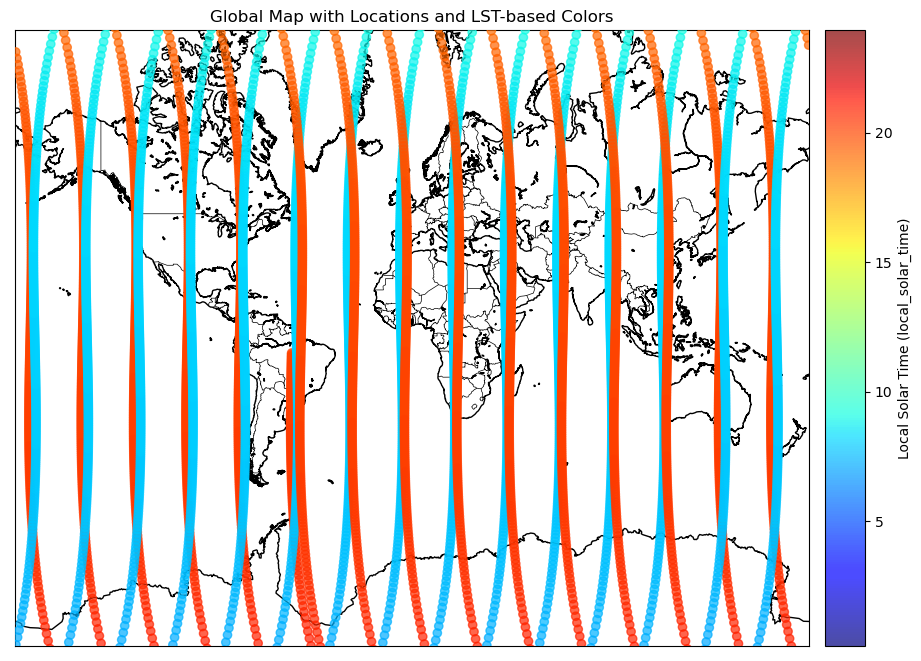

In [59]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)


# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and local solar time data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')
local_solar_time = cdf.varget('local_solar_time')  

# Create a colormap (you can change this to any other colormap)
cmap = plt.get_cmap('jet')

# Plot the data points with local solar time as color
x, y = m(longitude, latitude)
sc = m.scatter(x, y, c=local_solar_time, cmap=cmap, alpha=0.7, marker='o', zorder=10)


# Add a colorbar to the plot
cbar = m.colorbar(sc, location='right', label='Local Solar Time (local_solar_time)')

# Add a title and display the map
plt.title('Global Map with Locations and LST-based Colors')
plt.show()


##### Separate data for the two different LST zones

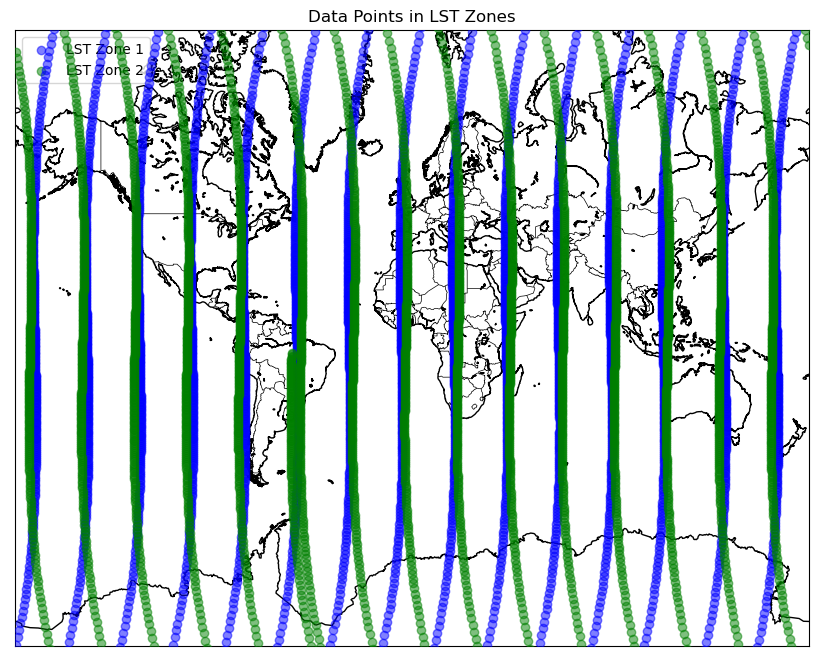

In [12]:
from mpl_toolkits.basemap import Basemap

# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and LST data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude') 
lst_data = cdf.varget('local_solar_time')  

# Define the LST boundaries for two zones
lst_zone1_start = 0.0  #  start time for the first zone (e.g., 0.0 for midnight)
lst_zone1_end = 12.0  # end time for the first zone (e.g., 12.0 for noon)

lst_zone2_start = 12.0  #  start time for the second zone (e.g., noon)
lst_zone2_end = 24.0  # end time for the second zone (e.g., 24.0 for midnight)

# Create masks for the two LST zones
mask_zone1 = (lst_data >= lst_zone1_start) & (lst_data < lst_zone1_end)
mask_zone2 = (lst_data >= lst_zone2_start) & (lst_data < lst_zone2_end)

# Plot the data points for LST Zone 1
x_zone1, y_zone1 = m(longitude[mask_zone1], latitude[mask_zone1])
m.scatter(x_zone1, y_zone1, c='blue', marker='o', alpha=0.5, label='LST Zone 1', zorder=10)

# Plot the data points for LST Zone 2
x_zone2, y_zone2 = m(longitude[mask_zone2], latitude[mask_zone2])
m.scatter(x_zone2, y_zone2, c='green', marker='o', alpha=0.5, label='LST Zone 2', zorder=10)

# Customize the plot (title, legend, etc.)
plt.title('Data Points in LST Zones')
plt.legend(loc='best')
plt.show()




##### Plot densities into a global map for the two LSTs separately

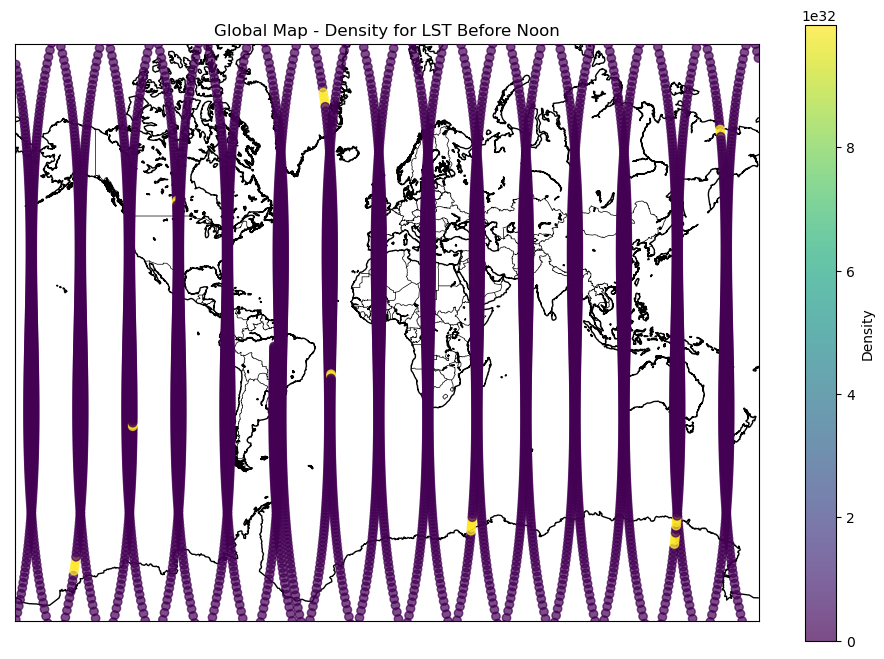

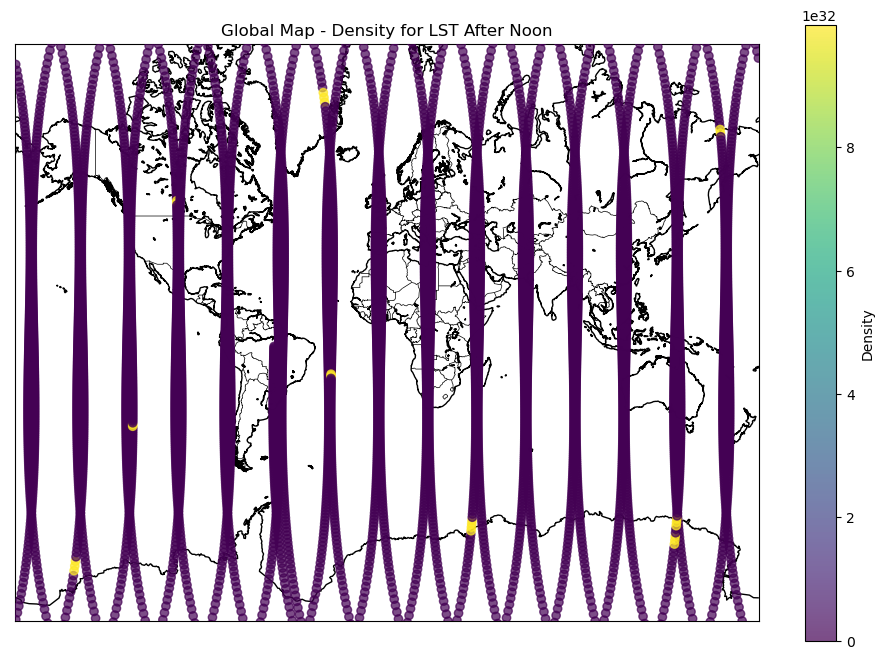

In [14]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Extract latitude, longitude, and LST data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude') 
lst_data = cdf.varget('local_solar_time') 
density = cdf.varget('density')

# Define the LST boundaries for two zones
lst_zone1_start = 0.0  #  start time for the first zone (e.g., 0.0 for midnight)
lst_zone1_end = 12.0  # end time for the first zone (e.g., 12.0 for noon)

lst_zone2_start = 12.0  #  start time for the second zone (e.g., noon)
lst_zone2_end = 24.0  # end time for the second zone (e.g., 24.0 for midnight)
    
# Create masks for the two LST zones
mask_zone1 = (lst_data >= lst_zone1_start) & (lst_data < lst_zone1_end)
mask_zone2 = (lst_data >= lst_zone2_start) & (lst_data < lst_zone2_end)

# Create a function to plot data on a global map
def plot_global_map(data, title):
    
    # Create a figure and axis for the map
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    
    # Create a Basemap object for plotting
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
    m.drawcoastlines()
    m.drawcountries()
    
    
    
    # Create a colormap (you can change this to any other colormap)
    cmap = plt.get_cmap('viridis')
    
    # Plot the data points with density as color
    x, y = m(longitude, latitude)
    sc = m.scatter(x, y, c=density, cmap=cmap, alpha=0.7, marker='o', zorder=10)
    
    
    
    
    # Add a colorbar for density values
    cbar = plt.colorbar(sc, ax=ax, label='Density')
    

    # Add a title
    plt.title(title)
    plt.show()
    
# Plot the global map for LST before noon
plot_global_map(mask_zone1, 'Global Map - Density for LST Before Noon')

# Plot the global map for LST after noon
plot_global_map(mask_zone2, 'Global Map - Density for LST After Noon')


##### Find the outlier from dataset using density and time columns

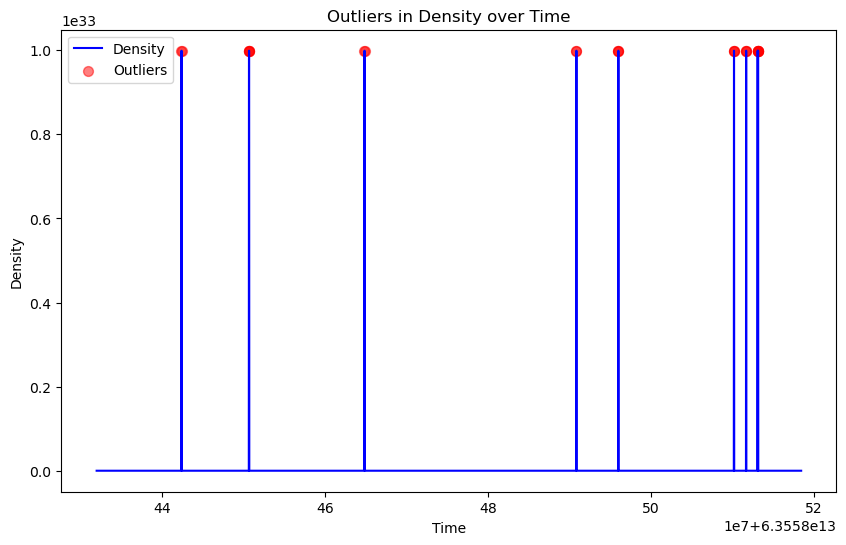

In [3]:
import cdflib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Swarm CDF file
data = cdflib.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file

# Access time and density data and convert them to NumPy arrays
timestamps = np.array(data['time'])  # Replace 'Time_column' with the actual variable name in your file
density_values = np.array(data['density'])  # Replace 'Density_column' with the actual variable name in your file

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, density_values, color='blue', label='Density')

# Calculate outliers using z-score method
threshold = 2
outliers = np.abs((density_values - np.mean(density_values)) / np.std(density_values)) > threshold

# Plot outliers
plt.scatter(timestamps[outliers], density_values[outliers], color='red', label='Outliers', s=50, alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Outliers in Density over Time')
plt.legend()
plt.show()


In [6]:
pip install aacgmv2

  Using cached aacgmv2-2.6.3.tar.gz (1.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build aacgmv2
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [303 lines of output]
  C:\Users\jose_ne\AppData\Local\Temp\pip-build-env-r8n7820n\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:80: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
    corresp(dist, value, root_dir)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\deprecated.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\utils.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\wrapper.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\__init__.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\__main__.py -> build\lib.win-amd64-cpython-310\aacgmv2
  running egg_info
  writing aacgmv2.egg-info\PKG-INFO
  writing dependency_links to aacgmv2.egg-info\dependency_links.txt
  writing 

### Plot density over time after removing outliers

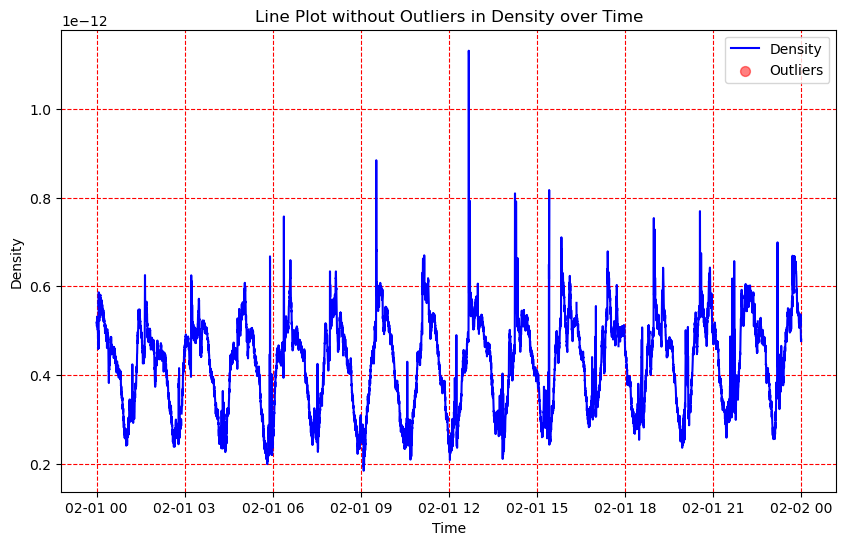

In [9]:
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import cdflib


# Load Swarm CDF file
data = cdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file


# Access time and density data and convert them to NumPy arrays
timestamps = np.array(data['time'])  # Replace 'Time_column' with the actual variable name in your file
density_values = np.array(data['density'])  # Replace 'Density_column' with the actual variable name in your file

# Calculate z-scores to identify outliers
z_scores = (density_values - np.mean(density_values)) / np.std(density_values)

# Set a threshold for z-scores to identify outliers
threshold = 2
outliers = np.abs(z_scores) > threshold

# Fill outlier points with NaN
density_values[outliers] = np.nan

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, density_values, color='blue', label='Density')


# Mark outliers on the plot
plt.scatter(timestamps[outliers], density_values[outliers], color='red', label='Outliers', s=50, alpha=0.5)

# Specify grid with line attributes
plt.grid(color='r', linestyle='--')



plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Line Plot without Outliers in Density over Time')

plt.legend()
plt.show()


### Plot densities of one day into a global map for the two LSTs separately (removal of outliers necessary)

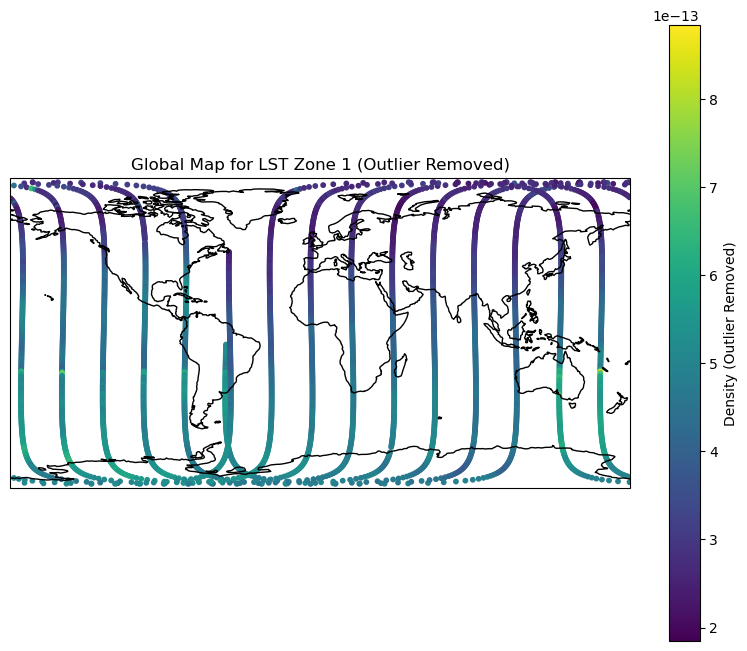

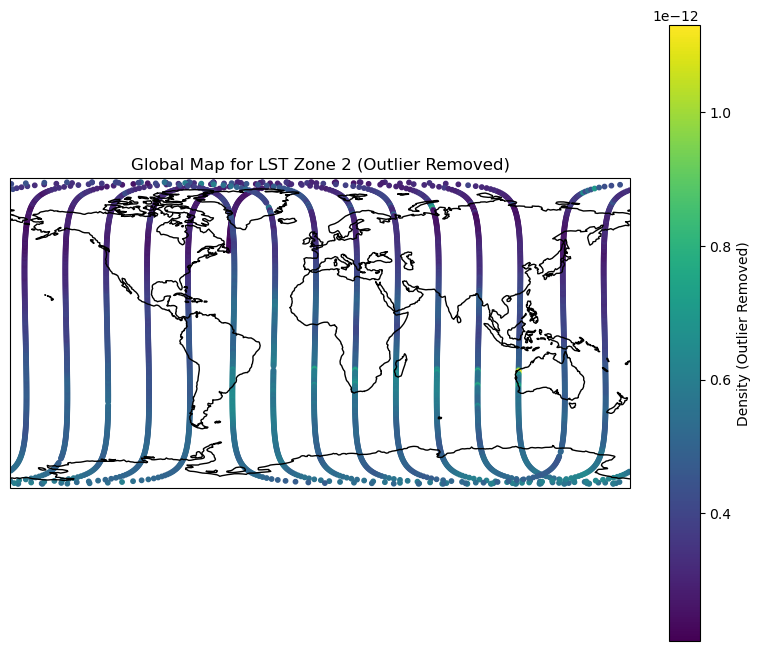

In [12]:
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from datetime import datetime


# Load Swarm CDF file
data = cdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file

# Access necessary data (e.g., latitude, longitude, density, and time)
latitude = np.array(data['latitude'])  # Replace with actual variable name
longitude = np.array(data['longitude'])  # Replace with actual variable name
density = np.array(data['density'])  # Replace with actual variable name
time = np.array(data['time'])  # Replace with actual variable name

# Convert datetime objects to hours for comparison
hours = np.array([t.hour for t in time])

# Divide time into two Local Solar Time (LST) zones
# Assuming LST values are in the range [0, 24)
lst_zone1_mask = (hours >= 0) & (hours < 12)
lst_zone2_mask = (hours >= 12) & (hours < 24)

# Identify and remove outliers in density
def remove_outliers(data, threshold=2):
    z_scores = (data - np.nanmean(data)) / np.nanstd(data)
    outliers = np.abs(z_scores) > threshold
    data[outliers] = np.nan
    return data

density_no_outliers1 = remove_outliers(density[lst_zone1_mask])
density_no_outliers2 = remove_outliers(density[lst_zone2_mask])

# Plot global map for LST Zone 1 with outlier-removed density
plt.figure(figsize=(10, 8))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
sc1 = ax1.scatter(longitude[lst_zone1_mask], latitude[lst_zone1_mask], c=density_no_outliers1, cmap='viridis', s=10, transform=ccrs.PlateCarree())
plt.colorbar(sc1, label='Density (Outlier Removed)')
plt.title('Global Map for LST Zone 1 (Outlier Removed)')
plt.show()

# Plot global map for LST Zone 2 with outlier-removed density
plt.figure(figsize=(10, 8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines()
sc2 = ax2.scatter(longitude[lst_zone2_mask], latitude[lst_zone2_mask], c=density_no_outliers2, cmap='viridis', s=10, transform=ccrs.PlateCarree())
plt.colorbar(sc2, label='Density (Outlier Removed)')
plt.title('Global Map for LST Zone 2 (Outlier Removed)')
plt.show()


In [13]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### write a code for automatic download of Swarm data, a full year data

In [19]:
import requests
import os
from datetime import datetime, timedelta

def download_swarm_data_for_year(year, product='DNSx_ACC', level='2', output_dir='swarm_data'):
    # Specify Swarm API URL
    swarm_api_url = 'https://swarm-diss.eo.esa.int/#swarm%2FLevel2daily%2FLatest_baselines%2FDNS%2FACC%2FSat_C'

    # Iterate over each day of the specified year
    start_date = datetime(2014, 1, 1)
    end_date = datetime(2014, 12, 31)

    current_date = start_date
    while current_date <= end_date:
        current_date_str = current_date.strftime('%Y%m%d')

        # Specify URL for the data file
        data_url = f'{swarm_api_url}/{product}/{level}/{current_date_str}'

        # Download the data file
        response = requests.get(data_url, stream=True)
        if response.status_code == 200:
            # Create output directory if it doesn't exist
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            # Save the data file
            output_file = os.path.join(output_dir, f'SW_{product}_{level}_{current_date_str}.CDF')
            with open(output_file, 'wb') as file:
                for chunk in response.iter_content(chunk_size=1024):
                    file.write(chunk)

            print(f'Downloaded: {output_file}')
        else:
            print(f'Failed to download data for {current_date_str}. Status Code: {response.status_code}')

        # Move to the next day
        current_date += timedelta(days=1)

# Example usage: Download Swarm data for the year 2014
download_swarm_data_for_year(2014, output_dir='path/directory')


Downloaded: path/directory\SW_DNSx_ACC_2_20140101.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140102.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140103.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140104.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140105.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140106.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140107.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140108.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140109.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140110.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140111.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140112.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140113.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140114.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140115.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140116.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140117.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140118.CDF
Downloaded: path/directory\S

In [2]:
import cdflib

def read_cdf(file_path):
    
    cdf_file = cdflib.CDF(file_path)

    latitude_var_name = 'latitude'
    longitude_var_name = 'longitude'

    
    latitude_values = cdf_file[latitude_var_name][...]
    longitude_values = cdf_file[longitude_var_name][...]

   
    del cdf_file

    return latitude_values, longitude_values

def print_coordinates(latitude_values, longitude_values):
    for lat, lon in zip(latitude_values, longitude_values):
        print(f"latitude: {lat}, longitude: {lon}")

if __name__ == "__main__":
    file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
    latitude_values, longitude_values = read_cdf(file_path)
    print_coordinates(latitude_values, longitude_values)


latitude: -6.712438757145884, longitude: -54.57183533152135
latitude: -7.350847632689601, longitude: -54.58601967168454
latitude: -7.989212093126568, longitude: -54.60012637550779
latitude: -8.627529969412496, longitude: -54.614148298101576
latitude: -9.265799106511272, longitude: -54.6280782021798
latitude: -9.904017341791974, longitude: -54.64190876437733
latitude: -10.542182559362784, longitude: -54.65563255169952
latitude: -11.180292648460451, longitude: -54.66924204313443
latitude: -11.818345507717105, longitude: -54.682729568344584
latitude: -12.456339061226805, longitude: -54.69608735627143
latitude: -13.094271239344959, longitude: -54.709307498996104
latitude: -13.732140020595777, longitude: -54.72238193478768
latitude: -14.369943381109907, longitude: -54.735302441493396
latitude: -15.00767931265816, longitude: -54.748060663091195
latitude: -15.645345836880804, longitude: -54.76064802850881
latitude: -16.28294101760187, longitude: -54.77305581551698
latitude: -16.92046290494749

### Read a full year of Swarm densities and plot into one time series (outliers removed). X-axis time, y-axis density.

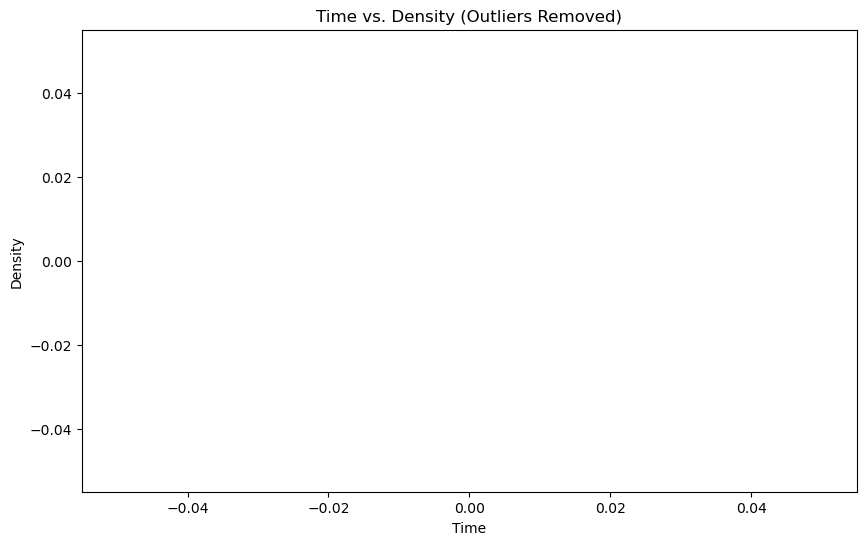

In [9]:
import os
import cdflib
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


def read_cdf(file_path):
    cdf_file = cdflib.CDF(file_path)

    # Replace 'Time' and 'Density' with the actual variable names in your CDF files
    time_var_name = 'time'
    density_var_name = 'density'

    time_values = cdf_file[time_var_name]
    density_values = cdf_file[density_var_name]

    cdf_file.close()

    return time_values, density_values

def process_folder(folder_path):
    data = {'time': [], 'density': []}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.cdf'):
            file_path = os.path.join(folder_path, file_name)
            time_values, density_values = read_cdf(file_path)

            data['time'].extend(time_values)
            data['density'].extend(density_values)

    df = pd.DataFrame(data)
    return df


def remove_outliers(df, column_name):
    z_scores = stats.zscore(df[column_name])
    df_no_outliers = df[(z_scores < 2) & (z_scores > -2)]
    return df_no_outliers

if __name__ == "__main__":
    # Replace 'your_folder_path' with the path to the folder containing CDF files
    folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/path/directory'

    df = process_folder(folder_path)

    # Remove outliers from the 'density' column
    df_no_outliers = remove_outliers(df, 'density')

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(df_no_outliers['time'], df_no_outliers['density'], marker='o', alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.title('Time vs. Density (Outliers Removed)')
    plt.show()

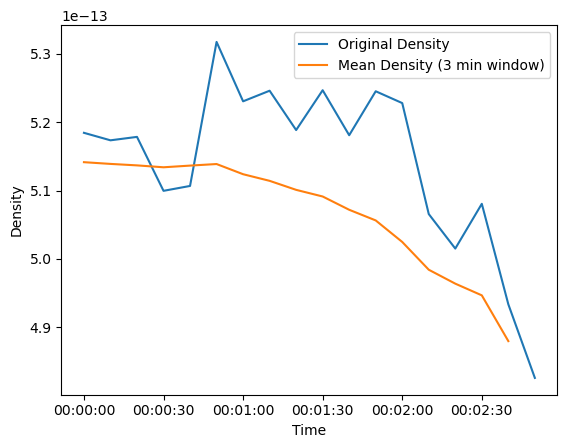

In [60]:
import spacepy.pycdf as pycdf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load CDF file
cdf_file = pycdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')

# Assuming 'Density_variable_name' is the actual variable name in your CDF file
density_data = cdf_file['density'][:18]  #

# Assuming 'Epoch' is the time variable in your CDF file
timestamps = cdf_file['time'][:18]


# Define window size in minutes
window_size_minutes = 3

# Create sliding window and calculate mean density
mean_density = []
for i in range(len(timestamps) - 1):
    start_time = timestamps[i]
    end_time = start_time + timedelta(minutes=window_size_minutes)
    
    # Find indices where timestamps are within the window
    window_indices = np.where((timestamps >= start_time) & (timestamps < end_time))[0]
    
    if len(window_indices) > 0:
        window = density_data[window_indices]
        mean_density.append(np.mean(window))
    else:
        mean_density.append(np.nan)

# Plot the results
plt.plot(timestamps, density_data, label='Original Density')
plt.plot(timestamps[:-1], mean_density, label=f'Mean Density ({window_size_minutes} min window)')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()


In [98]:
import pandas as pd
import spacepy.pycdf as cdf

file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
        
df = pd.DataFrame(variable_values)
df['time'] = pd.to_datetime(df['time'])
print(df['time'])

df['Date'] = df['time'].dt.date
df['Time'] = df['time'].dt.time
df.set_index('Time', inplace=True)
df.drop(columns=['time','altitude','latitude','longitude','local_solar_time'], inplace=True)
pivot_df = df.pivot(columns='Date', values='density')
pivot_df.columns = ['2014-02-01']
pivot_df
        

    
    
    

0      2014-02-01 00:00:00
1      2014-02-01 00:00:10
2      2014-02-01 00:00:20
3      2014-02-01 00:00:30
4      2014-02-01 00:00:40
               ...        
8635   2014-02-01 23:59:10
8636   2014-02-01 23:59:20
8637   2014-02-01 23:59:30
8638   2014-02-01 23:59:40
8639   2014-02-01 23:59:50
Name: time, Length: 8640, dtype: datetime64[ns]


2014-02-01
Time                
00:00:00    0.000000
00:00:10    0.000000
00:00:20    0.000000
00:00:30    0.000000
00:00:40    0.000000
...              ...
23:59:10    0.000000
23:59:20    0.000000
23:59:30    0.000000
23:59:40    0.000000
23:59:50    0.000000

[8640 rows x 1 columns]

### Different Outlier Detection Methods

#### 1.  Identify outliers by finding rows that differ from the mean column value by more than 1.5 standard deviations

In [22]:
import pandas as pd
import spacepy.pycdf as cdf

file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
df['outliers'] = 0
df.loc[(df.density - df.density.mean()).abs() > 1.5*df.density.std(), 'outliers'] = 1
df2 = df[df.outliers == 1].reset_index(drop=True)
df = df[df.outliers == 0].reset_index(drop=True)
print(df2)
print(df)

                  time       density  outliers
0  2014-02-01 02:53:20  9.990000e+32         1
1  2014-02-01 02:53:30  9.990000e+32         1
2  2014-02-01 05:11:10  9.990000e+32         1
3  2014-02-01 05:11:20  9.990000e+32         1
4  2014-02-01 05:11:30  9.990000e+32         1
5  2014-02-01 05:11:40  9.990000e+32         1
6  2014-02-01 09:07:20  9.990000e+32         1
7  2014-02-01 09:07:30  9.990000e+32         1
8  2014-02-01 16:20:20  9.990000e+32         1
9  2014-02-01 16:20:30  9.990000e+32         1
10 2014-02-01 17:46:00  9.990000e+32         1
11 2014-02-01 17:46:10  9.990000e+32         1
12 2014-02-01 17:46:20  9.990000e+32         1
13 2014-02-01 21:42:20  9.990000e+32         1
14 2014-02-01 21:42:30  9.990000e+32         1
15 2014-02-01 21:42:40  9.990000e+32         1
16 2014-02-01 22:07:10  9.990000e+32         1
17 2014-02-01 22:07:20  9.990000e+32         1
18 2014-02-01 22:07:30  9.990000e+32         1
19 2014-02-01 22:30:40  9.990000e+32         1
20 2014-02-01

### Standard Deviation Method/Z-Score Method:

The Z-score measures how many standard deviations a data point is from the mean. Data points with a Z-score beyond a certain threshold (commonly 2 or 3) are considered outliers.

In [42]:
import pandas as pd
import spacepy.pycdf as cdf
import numpy as np
from scipy import stats


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
threshold = 3
z_scores = (df['density'] - df['density'].mean()) / df['density'].std()
outliers = df[abs(z_scores) > threshold]
outliers_reset_index = outliers.reset_index(drop=True)

print("Original DataFrame:")
print(df)
print("\nOutliers using Standard Deviation Method:")
print(outliers_reset_index)

Original DataFrame:
                    time       density
0    2014-02-01 00:00:00  5.184454e-13
1    2014-02-01 00:00:10  5.173494e-13
2    2014-02-01 00:00:20  5.178510e-13
3    2014-02-01 00:00:30  5.099569e-13
4    2014-02-01 00:00:40  5.106715e-13
...                  ...           ...
8635 2014-02-01 23:59:10  4.885602e-13
8636 2014-02-01 23:59:20  4.819704e-13
8637 2014-02-01 23:59:30  4.785112e-13
8638 2014-02-01 23:59:40  4.822021e-13
8639 2014-02-01 23:59:50  4.767876e-13

[8640 rows x 2 columns]

Outliers using Standard Deviation Method:
                  time       density
0  2014-02-01 02:53:20  9.990000e+32
1  2014-02-01 02:53:30  9.990000e+32
2  2014-02-01 05:11:10  9.990000e+32
3  2014-02-01 05:11:20  9.990000e+32
4  2014-02-01 05:11:30  9.990000e+32
5  2014-02-01 05:11:40  9.990000e+32
6  2014-02-01 09:07:20  9.990000e+32
7  2014-02-01 09:07:30  9.990000e+32
8  2014-02-01 16:20:20  9.990000e+32
9  2014-02-01 16:20:30  9.990000e+32
10 2014-02-01 17:46:00  9.990000e+32


### Interquartile Range (IQR) Method:

The interquartile range is the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. Data points outside the range are considered outliers.

In [41]:
import pandas as pd
import spacepy.pycdf as cdf
import numpy as np


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)


q1 = df['density'].quantile(0.25)
q3 = df['density'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['density'] < lower_bound) | (df['density'] > upper_bound)]
outliers_reset_index = outliers.reset_index(drop=True)

print("\nOutliers using IQR Method:")
print(outliers_reset_index)



Outliers using IQR Method:
                  time       density
0  2014-02-01 02:53:20  9.990000e+32
1  2014-02-01 02:53:30  9.990000e+32
2  2014-02-01 05:11:10  9.990000e+32
3  2014-02-01 05:11:20  9.990000e+32
4  2014-02-01 05:11:30  9.990000e+32
5  2014-02-01 05:11:40  9.990000e+32
6  2014-02-01 06:22:40  7.573899e-13
7  2014-02-01 09:07:20  9.990000e+32
8  2014-02-01 09:07:30  9.990000e+32
9  2014-02-01 09:31:30  8.840953e-13
10 2014-02-01 12:40:20  9.281122e-13
11 2014-02-01 12:40:30  1.130835e-12
12 2014-02-01 12:40:40  1.118899e-12
13 2014-02-01 12:40:50  8.503139e-13
14 2014-02-01 12:42:50  7.924419e-13
15 2014-02-01 14:15:00  8.094519e-13
16 2014-02-01 14:17:10  7.914174e-13
17 2014-02-01 15:24:50  8.169433e-13
18 2014-02-01 16:20:20  9.990000e+32
19 2014-02-01 16:20:30  9.990000e+32
20 2014-02-01 17:46:00  9.990000e+32
21 2014-02-01 17:46:10  9.990000e+32
22 2014-02-01 17:46:20  9.990000e+32
23 2014-02-01 20:33:00  7.694144e-13
24 2014-02-01 21:42:20  9.990000e+32
25 2014-02

In [44]:
pip install scikit-learn


   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.3 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.3 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.3 MB 5.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.3 MB 6.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.3 MB 6.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.3 MB 6.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.3 MB 7.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.3 MB 7.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.8/9.3 MB 7.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.3 MB 7.4 MB/s eta 0:00:01
   ----------------

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
DBSCAN is a clustering algorithm that can also be used for outlier detection. Outliers are data points that do not belong to any cluster.

In [53]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
eps = 3 
min_samples = 200
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['Cluster'] = dbscan.fit_predict(df[['density']])

outliers_dbscan = df[df['Cluster'] == -1]
outliers_dbscan_reset_index = outliers_dbscan.reset_index(drop=True)

print("\nOutliers using DBSCAN Method:")
print(outliers_dbscan_reset_index)




Outliers using DBSCAN Method:
                  time       density  Cluster
0  2014-02-01 02:53:20  9.990000e+32       -1
1  2014-02-01 02:53:30  9.990000e+32       -1
2  2014-02-01 05:11:10  9.990000e+32       -1
3  2014-02-01 05:11:20  9.990000e+32       -1
4  2014-02-01 05:11:30  9.990000e+32       -1
5  2014-02-01 05:11:40  9.990000e+32       -1
6  2014-02-01 09:07:20  9.990000e+32       -1
7  2014-02-01 09:07:30  9.990000e+32       -1
8  2014-02-01 16:20:20  9.990000e+32       -1
9  2014-02-01 16:20:30  9.990000e+32       -1
10 2014-02-01 17:46:00  9.990000e+32       -1
11 2014-02-01 17:46:10  9.990000e+32       -1
12 2014-02-01 17:46:20  9.990000e+32       -1
13 2014-02-01 21:42:20  9.990000e+32       -1
14 2014-02-01 21:42:30  9.990000e+32       -1
15 2014-02-01 21:42:40  9.990000e+32       -1
16 2014-02-01 22:07:10  9.990000e+32       -1
17 2014-02-01 22:07:20  9.990000e+32       -1
18 2014-02-01 22:07:30  9.990000e+32       -1
19 2014-02-01 22:30:40  9.990000e+32       -1
20 

### Local Outlier Factor (LOF):

LOF measures the local density deviation of a data point with respect to its neighbors. Points with significantly lower density are considered outliers.

In [56]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)

n_neighbors = 200
lof = LocalOutlierFactor(n_neighbors=n_neighbors)
df['LOF_Score'] = lof.fit_predict(df[['density']])

outliers_lof = df[df['LOF_Score'] == -1]
outliers_lof_reset_index = outliers_lof.reset_index(drop=True)

print("\nOutliers using LOF Method:")
print(outliers_lof_reset_index)


Outliers using LOF Method:
                  time       density  LOF_Score
0  2014-02-01 02:53:20  9.990000e+32         -1
1  2014-02-01 02:53:30  9.990000e+32         -1
2  2014-02-01 05:11:10  9.990000e+32         -1
3  2014-02-01 05:11:20  9.990000e+32         -1
4  2014-02-01 05:11:30  9.990000e+32         -1
5  2014-02-01 05:11:40  9.990000e+32         -1
6  2014-02-01 09:07:20  9.990000e+32         -1
7  2014-02-01 09:07:30  9.990000e+32         -1
8  2014-02-01 16:20:20  9.990000e+32         -1
9  2014-02-01 16:20:30  9.990000e+32         -1
10 2014-02-01 17:46:00  9.990000e+32         -1
11 2014-02-01 17:46:10  9.990000e+32         -1
12 2014-02-01 17:46:20  9.990000e+32         -1
13 2014-02-01 21:42:20  9.990000e+32         -1
14 2014-02-01 21:42:30  9.990000e+32         -1
15 2014-02-01 21:42:40  9.990000e+32         -1
16 2014-02-01 22:07:10  9.990000e+32         -1
17 2014-02-01 22:07:20  9.990000e+32         -1
18 2014-02-01 22:07:30  9.990000e+32         -1
19 2014-02-0

#### Lag and Lead

In [12]:
import pandas as pd
import spacepy.pycdf as cdf


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
#df.rolling(window = 10, on='time').density.mean()
df['density_lag'] = df['density'].shift(1)but 
df['density_lead'] = df.density.shift(-1)
df.head()
df.tail()

time       density   density_lag  density_lead
8635 2014-02-01 23:59:10  4.885602e-13  4.959258e-13  4.819704e-13
8636 2014-02-01 23:59:20  4.819704e-13  4.885602e-13  4.785112e-13
8637 2014-02-01 23:59:30  4.785112e-13  4.819704e-13  4.822021e-13
8638 2014-02-01 23:59:40  4.822021e-13  4.785112e-13  4.767876e-13
8639 2014-02-01 23:59:50  4.767876e-13  4.822021e-13           NaN

#### 30 minute moving average

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


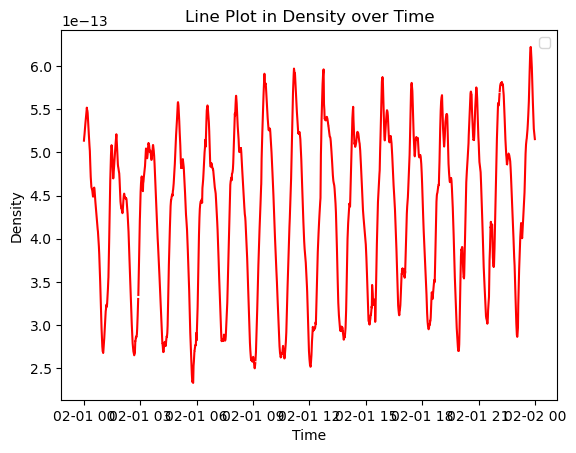

In [86]:
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np

file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
threshold = 3
z_scores = (df['density'] - df['density'].mean()) / df['density'].std()
outliers = df[abs(z_scores) > threshold]
df[abs(z_scores) > threshold] = np.nan
df.set_index('time', inplace=True)
window_size = 6*10
rolling_avg = df['density'].rolling(window=window_size, center=True, min_periods = 15).mean()
df['3min_rolling_avg'] = rolling_avg
rolling_sum = df['density'].rolling(window=window_size).sum()
df['3min_rolling_sum'] = rolling_sum
df.head(30)

plt.plot(rolling_avg, color='red')

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Line Plot in Density over Time')

plt.legend()
plt.show()


### Download the zip files from swarm ftp server and extract cdf file from zip files

In [1]:
from ftplib import FTP
import os
import zipfile

ftp_url = 'swarm-diss.eo.esa.int'
ftp = FTP(ftp_url)

# Login to the FTP server (if authentication is required)
# Replace 'username' and 'password' with your credentials if needed
ftp.login()

# Change to the directory containing the ZIP file and files to download
directory_path = '/Level2daily/Latest_baselines/DNS/ACC/Sat_C'  # Replace with the directory path you want to navigate to
ftp.cwd(directory_path)

# List files in the directory
file_list = []
ftp.dir(file_list.append)

# Filter filenames from the list of files
file_list = [line.split()[-1] for line in file_list if line.startswith('-')]

# Download each file in the directory to the local directory
local_directory = 'New folder'
os.makedirs(local_directory, exist_ok=True)

print('Download Started.')
for filename in file_list:
    local_filename = os.path.join(local_directory, filename)
    with open(local_filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
        print(filename)
print('Download finished.')

# Find and extract .zip file
zip_files = [file for file in file_list if file.endswith('.zip')]
directory_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/New folder'  # Replace with the directory path you want to list

# List all files and directories in the specified directory
files_in_directory = os.listdir(directory_path)

# Filter out only files (excluding directories)
zip_files = [file for file in files_in_directory if file.endswith('.ZIP')]
print(zip_files)
if zip_files:
    for zip_filename in zip_files:
    #zip_filename = zip_files[0]  # Use the first ZIP file found
        local_zip_path = os.path.join(local_directory, zip_filename)

        # Download the ZIP file
        with open(local_zip_path, 'wb') as file:
            ftp.retrbinary(f"RETR {zip_filename}", file.write)

        # Extract .cdf files from the ZIP
        with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
            cdf_files = [name for name in zip_ref.namelist() if name.endswith('.cdf')]
            print(cdf_files)
            extracted_cdf_directory = 'extracted_cdf'
            os.makedirs(extracted_cdf_directory, exist_ok=True)

            for cdf_file in cdf_files:
                zip_ref.extract(cdf_file, path=extracted_cdf_directory)

ftp.quit()

Download Started.
SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140202T000000_20140202T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140203T000000_20140203T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140204T000000_20140204T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140205T000000_20140205T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140206T000000_20140206T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140207T000000_20140207T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140208T000000_20140208T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140209T000000_20140209T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140210T000000_20140210T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140211T000000_20140211T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140212T000000_20140212T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140213T000000_20140213T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140214T000000_20140214T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140215T000000_20140215T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140216T000000_20140216T235950_0201.ZIP
SW_OPER_DNSCACC_2__201

'221-Goodbye. You uploaded 0 and downloaded 2198704 kbytes.\n221 Logout.'

### Extract  files of 2014

In [119]:
import os
from datetime import datetime, timedelta
import shutil
import re

def extract_files_by_year(directory_path, target_year):
    for filename in os.listdir(directory_path):
        if filename.endswith('.cdf'):
            # Extract timestamps from the filename using a regular expression
            match = re.match(r'SW_OPER_DNSCACC_2__(\d{4})(\d{2})(\d{2})T(\d{2})(\d{2})(\d{2})_(\d{4})(\d{2})(\d{2})T(\d{2})(\d{2})(\d{2})_(\d+).cdf', filename)

            if match:
                start_year, start_month, start_day, start_hour, start_minute, start_second, end_year, end_month, end_day, end_hour, end_minute, end_second, version = match.groups()

                # Construct datetime objects for start and end timestamps
                start_timestamp = datetime(int(start_year), int(start_month), int(start_day), int(start_hour), int(start_minute), int(start_second))
                end_timestamp = datetime(int(end_year), int(end_month), int(end_day), int(end_hour), int(end_minute), int(end_second))

                # Check if the file's start year matches the target year
                if start_timestamp.year == target_year:
                    # Create a new directory for the extracted files
                    extracted_dir = f"extracted2_files_{target_year}"
                    os.makedirs(extracted_dir, exist_ok=True)

                    # Copy the file to the new directory
                    shutil.copy(os.path.join(directory_path, filename), extracted_dir)

# Example usage: Replace 'your_directory' with the actual path to your directory containing the files
directory_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_cdf'
target_year = 2014  # Replace with the desired year

# Extract files for the specified year
extract_files_by_year(directory_path, target_year)


### Combine one year data

In [140]:
import os
import cdflib
import pandas as pd

def extract_variables(file_path):
    cdf_file = cdflib.CDF(file_path)
   
    # Extract the variables you're interested in (modify as needed)
    time_values = cdf_file['time'][...]
    density_values = cdf_file['density'][...]
    altitude_values = cdf_file['altitude'][...]
   
    del cdf_file

    # Create a DataFrame for the variables
    df = pd.DataFrame({'time': time_values, 'density': density_values, 'altitude': altitude_values})
    

    return df

# Replace 'your_folder_path' with the actual path to the folder containing CDF files
folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'

# Get a list of CDF files in the folder
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate through CDF files
for cdf_file_name in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_file_name)

    # Extract variables and create a DataFrame
    df = extract_variables(cdf_file_path)
    #df.index = pd.to_datetime(df['time'])

    # Display information about the DataFrame
    print(f"\nFile: {cdf_file_name}")
    print(df.head())

    # Append the DataFrame to the combined DataFrame
    combined_df = combined_df.append(df, ignore_index=True)

# Display the combined DataFrame
print("\nCombined DataFrame:")
print(combined_df)

                      time  density      altitude
0    63558432000000.000000 0.000000 494739.849495
1    63558432010000.000000 0.000000 494892.962741
2    63558432020000.000000 0.000000 495050.712763
3    63558432030000.000000 0.000000 495213.057146
4    63558432040000.000000 0.000000 495379.955465
...                    ...      ...           ...
8635 63558518350000.000000 0.000000 524038.760554
8636 63558518360000.000000 0.000000 524110.934032
8637 63558518370000.000000 0.000000 524177.630182
8638 63558518380000.000000 0.000000 524238.832750
8639 63558518390000.000000 0.000000 524294.528001

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf
                   time  density      altitude
0 63558432000000.000000 0.000000 494739.849495
1 63558432010000.000000 0.000000 494892.962741
2 63558432020000.000000 0.000000 495050.712763
3 63558432030000.000000 0.000000 495213.057146
4 63558432040000.000000 0.000000 495379.955465
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63562320000000.000000 0.000000 494475.459082
1    63562320010000.000000 0.000000 494420.011541
2    63562320020000.000000 0.000000 494362.069431
3    63562320030000.000000 0.000000 494301.683332
4    63562320040000.000000 0.000000 494238.906939
...                    ...      ...           ...
8635 63562406350000.000000 0.000000 494681.380255
8636 63562406360000.000000 0.000000 494903.754501
8637 63562406370000.000000 0.000000 495128.878791
8638 63562406380000.000000 0.000000 495356.677087
8639 63562406390000.000000 0.000000 495587.071726

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140318T000000_20140318T235950_0202.cdf
                   time  density      altitude
0 63562320000000.000000 0.000000 494475.459082
1 63562320010000.000000 0.000000 494420.011541
2 63562320020000.000000 0.000000 494362.069431
3 63562320030000.000000 0.000000 494301.683332
4 63562320040000.000000 0.000000 494238.906939
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time                                  density  \
0    63564393600000.000000 998999999999999978487918637350912.000000   
1    63564393610000.000000 998999999999999978487918637350912.000000   
2    63564393620000.000000 998999999999999978487918637350912.000000   
3    63564393630000.000000 998999999999999978487918637350912.000000   
4    63564393640000.000000 998999999999999978487918637350912.000000   
...                    ...                                      ...   
8635 63564479950000.000000                                 0.000000   
8636 63564479960000.000000                                 0.000000   
8637 63564479970000.000000                                 0.000000   
8638 63564479980000.000000                                 0.000000   
8639 63564479990000.000000                                 0.000000   

          altitude  
0    470960.021397  
1    470993.649369  
2    471031.060890  
3    471072.200070  
4    471117.008969  
...            ...  


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63566121600000.000000 0.000000 467791.147709
1    63566121610000.000000 0.000000 467844.532683
2    63566121620000.000000 0.000000 467902.458573
3    63566121630000.000000 0.000000 467964.935806
4    63566121640000.000000 0.000000 468031.975964
...                    ...      ...           ...
8635 63566207950000.000000 0.000000 495099.816245
8636 63566207960000.000000 0.000000 494968.951260
8637 63566207970000.000000 0.000000 494833.106355
8638 63566207980000.000000 0.000000 494692.337823
8639 63566207990000.000000 0.000000 494546.701824

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140501T000000_20140501T235950_0201.cdf
                   time  density      altitude
0 63566121600000.000000 0.000000 467791.147709
1 63566121610000.000000 0.000000 467844.532683
2 63566121620000.000000 0.000000 467902.458573
3 63566121630000.000000 0.000000 467964.935806
4 63566121640000.000000 0.000000 468031.975964
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63567590400000.000000 0.000000 468573.281205
1    63567590410000.000000 0.000000 468444.459965
2    63567590420000.000000 0.000000 468320.120365
3    63567590430000.000000 0.000000 468200.284183
4    63567590440000.000000 0.000000 468084.972743
...                    ...      ...           ...
8635 63567676750000.000000 0.000000 475265.825871
8636 63567676760000.000000 0.000000 475171.522189
8637 63567676770000.000000 0.000000 475074.983913
8638 63567676780000.000000 0.000000 474976.272681
8639 63567676790000.000000 0.000000 474875.452928

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140518T000000_20140518T235950_0201.cdf
                   time  density      altitude
0 63567590400000.000000 0.000000 468573.281205
1 63567590410000.000000 0.000000 468444.459965
2 63567590420000.000000 0.000000 468320.120365
3 63567590430000.000000 0.000000 468200.284183
4 63567590440000.000000 0.000000 468084.972743
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63568713600000.000000 0.000000 476492.478216
1    63568713610000.000000 0.000000 476534.442752
2    63568713620000.000000 0.000000 476573.208444
3    63568713630000.000000 0.000000 476608.751080
4    63568713640000.000000 0.000000 476641.049165
...                    ...      ...           ...
8635 63568799950000.000000 0.000000 471961.571341
8636 63568799960000.000000 0.000000 472169.702968
8637 63568799970000.000000 0.000000 472381.244311
8638 63568799980000.000000 0.000000 472596.128294
8639 63568799990000.000000 0.000000 472814.281404

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140531T000000_20140531T235950_0201.cdf
                   time  density      altitude
0 63568713600000.000000 0.000000 476492.478216
1 63568713610000.000000 0.000000 476534.442752
2 63568713620000.000000 0.000000 476573.208444
3 63568713630000.000000 0.000000 476608.751080
4 63568713640000.000000 0.000000 476641.049165
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63569836800000.000000 0.000000 466491.182148
1    63569836810000.000000 0.000000 466525.853209
2    63569836820000.000000 0.000000 466565.025426
3    63569836830000.000000 0.000000 466608.717822
4    63569836840000.000000 0.000000 466656.944086
...                    ...      ...           ...
8635 63569923150000.000000 0.000000 493665.142105
8636 63569923160000.000000 0.000000 493542.389905
8637 63569923170000.000000 0.000000 493414.683911
8638 63569923180000.000000 0.000000 493282.075736
8639 63569923190000.000000 0.000000 493144.620513

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140613T000000_20140613T235950_0201.cdf
                   time  density      altitude
0 63569836800000.000000 0.000000 466491.182148
1 63569836810000.000000 0.000000 466525.853209
2 63569836820000.000000 0.000000 466565.025426
3 63569836830000.000000 0.000000 466608.717822
4 63569836840000.000000 0.000000 466656.944086
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63571132800000.000000 0.000000 468910.249951
1    63571132810000.000000 0.000000 468784.731758
2    63571132820000.000000 0.000000 468660.685734
3    63571132830000.000000 0.000000 468538.202801
4    63571132840000.000000 0.000000 468417.372290
...                    ...      ...           ...
8635 63571219150000.000000 0.000000 493040.967213
8636 63571219160000.000000 0.000000 493185.454362
8637 63571219170000.000000 0.000000 493325.060082
8638 63571219180000.000000 0.000000 493459.729614
8639 63571219190000.000000 0.000000 493589.409278

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140628T000000_20140628T235950_0201.cdf
                   time  density      altitude
0 63571132800000.000000 0.000000 468910.249951
1 63571132810000.000000 0.000000 468784.731758
2 63571132820000.000000 0.000000 468660.685734
3 63571132830000.000000 0.000000 468538.202801
4 63571132840000.000000 0.000000 468417.372290
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63571996800000.000000 0.000000 488964.792825
1    63571996810000.000000 0.000000 489198.583764
2    63571996820000.000000 0.000000 489429.064192
3    63571996830000.000000 0.000000 489656.144703
4    63571996840000.000000 0.000000 489879.733293
...                    ...      ...           ...
8635 63572083150000.000000 0.000000 469004.625160
8636 63572083160000.000000 0.000000 468860.718356
8637 63572083170000.000000 0.000000 468721.096202
8638 63572083180000.000000 0.000000 468585.788396
8639 63572083190000.000000 0.000000 468454.823781

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140708T000000_20140708T235950_0201.cdf
                   time  density      altitude
0 63571996800000.000000 0.000000 488964.792825
1 63571996810000.000000 0.000000 489198.583764
2 63571996820000.000000 0.000000 489429.064192
3 63571996830000.000000 0.000000 489656.144703
4 63571996840000.000000 0.000000 489879.733293
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63573206400000.000000 0.000000 474904.436285
1    63573206410000.000000 0.000000 474858.685067
2    63573206420000.000000 0.000000 474809.872798
3    63573206430000.000000 0.000000 474758.026091
4    63573206440000.000000 0.000000 474703.180169
...                    ...      ...           ...
8635 63573292750000.000000 0.000000 478081.281565
8636 63573292760000.000000 0.000000 478364.035001
8637 63573292770000.000000 0.000000 478647.723319
8638 63573292780000.000000 0.000000 478932.240489
8639 63573292790000.000000 0.000000 479217.481161

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140722T000000_20140722T235950_0201.cdf
                   time  density      altitude
0 63573206400000.000000 0.000000 474904.436285
1 63573206410000.000000 0.000000 474858.685067
2 63573206420000.000000 0.000000 474809.872798
3 63573206430000.000000 0.000000 474758.026091
4 63573206440000.000000 0.000000 474703.180169
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63574243200000.000000 0.000000 474609.537985
1    63574243210000.000000 0.000000 474649.940071
2    63574243220000.000000 0.000000 474687.236660
3    63574243230000.000000 0.000000 474721.403996
4    63574243240000.000000 0.000000 474752.421003
...                    ...      ...           ...
8635 63574329550000.000000 0.000000 471849.337887
8636 63574329560000.000000 0.000000 472076.971621
8637 63574329570000.000000 0.000000 472307.783517
8638 63574329580000.000000 0.000000 472541.694780
8639 63574329590000.000000 0.000000 472778.629862

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140803T000000_20140803T235950_0201.cdf
                   time  density      altitude
0 63574243200000.000000 0.000000 474609.537985
1 63574243210000.000000 0.000000 474649.940071
2 63574243220000.000000 0.000000 474687.236660
3 63574243230000.000000 0.000000 474721.403996
4 63574243240000.000000 0.000000 474752.421003
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63575280000000.000000 0.000000 473110.885483
1    63575280010000.000000 0.000000 473206.969723
2    63575280020000.000000 0.000000 473300.729814
3    63575280030000.000000 0.000000 473392.107086
4    63575280040000.000000 0.000000 473481.046495
...                    ...      ...           ...
8635 63575366350000.000000 0.000000 468264.178150
8636 63575366360000.000000 0.000000 468418.010422
8637 63575366370000.000000 0.000000 468576.060436
8638 63575366380000.000000 0.000000 468738.288366
8639 63575366390000.000000 0.000000 468904.651913

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140815T000000_20140815T235950_0201.cdf
                   time  density      altitude
0 63575280000000.000000 0.000000 473110.885483
1 63575280010000.000000 0.000000 473206.969723
2 63575280020000.000000 0.000000 473300.729814
3 63575280030000.000000 0.000000 473392.107086
4 63575280040000.000000 0.000000 473481.046495
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63576057600000.000000 0.000000 471994.680886
1    63576057610000.000000 0.000000 472114.463389
2    63576057620000.000000 0.000000 472232.616999
3    63576057630000.000000 0.000000 472349.068487
4    63576057640000.000000 0.000000 472463.745317
...                    ...      ...           ...
8635 63576143950000.000000 0.000000 466842.501724
8636 63576143960000.000000 0.000000 466945.836749
8637 63576143970000.000000 0.000000 467053.640959
8638 63576143980000.000000 0.000000 467165.898114
8639 63576143990000.000000 0.000000 467282.592383

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140824T000000_20140824T235950_0201.cdf
                   time  density      altitude
0 63576057600000.000000 0.000000 471994.680886
1 63576057610000.000000 0.000000 472114.463389
2 63576057620000.000000 0.000000 472232.616999
3 63576057630000.000000 0.000000 472349.068487
4 63576057640000.000000 0.000000 472463.745317
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63576835200000.000000 0.000000 471023.427897
1    63576835210000.000000 0.000000 471153.509033
2    63576835220000.000000 0.000000 471282.530071
3    63576835230000.000000 0.000000 471410.409405
4    63576835240000.000000 0.000000 471537.063806
...                    ...      ...           ...
8635 63576921550000.000000 0.000000 465803.486094
8636 63576921560000.000000 0.000000 465871.949837
8637 63576921570000.000000 0.000000 465944.941466
8638 63576921580000.000000 0.000000 466022.463582
8639 63576921590000.000000 0.000000 466104.518876

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140902T000000_20140902T235950_0201.cdf
                   time  density      altitude
0 63576835200000.000000 0.000000 471023.427897
1 63576835210000.000000 0.000000 471153.509033
2 63576835220000.000000 0.000000 471282.530071
3 63576835230000.000000 0.000000 471410.409405
4 63576835240000.000000 0.000000 471537.063806
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63577612800000.000000 0.000000 470651.589050
1    63577612810000.000000 0.000000 470783.227976
2    63577612820000.000000 0.000000 470914.039679
3    63577612830000.000000 0.000000 471043.939595
4    63577612840000.000000 0.000000 471172.842827
...                    ...      ...           ...
8635 63577699150000.000000 0.000000 465172.742495
8636 63577699160000.000000 0.000000 465226.816885
8637 63577699170000.000000 0.000000 465285.414743
8638 63577699180000.000000 0.000000 465348.547467
8639 63577699190000.000000 0.000000 465416.219510

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140911T000000_20140911T235950_0201.cdf
                   time  density      altitude
0 63577612800000.000000 0.000000 470651.589050
1 63577612810000.000000 0.000000 470783.227976
2 63577612820000.000000 0.000000 470914.039679
3 63577612830000.000000 0.000000 471043.939595
4 63577612840000.000000 0.000000 471172.842827
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63578390400000.000000 0.000000 470737.115547
1    63578390410000.000000 0.000000 470864.542499
2    63578390420000.000000 0.000000 470990.950667
3    63578390430000.000000 0.000000 471116.257670
4    63578390440000.000000 0.000000 471240.378956
...                    ...      ...           ...
8635 63578476750000.000000 0.000000 464650.969547
8636 63578476760000.000000 0.000000 464717.057185
8637 63578476770000.000000 0.000000 464787.734432
8638 63578476780000.000000 0.000000 464863.003357
8639 63578476790000.000000 0.000000 464942.864537

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140920T000000_20140920T235950_0201.cdf
                   time  density      altitude
0 63578390400000.000000 0.000000 470737.115547
1 63578390410000.000000 0.000000 470864.542499
2 63578390420000.000000 0.000000 470990.950667
3 63578390430000.000000 0.000000 471116.257670
4 63578390440000.000000 0.000000 471240.378956
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63579168000000.000000 0.000000 471349.362741
1    63579168010000.000000 0.000000 471464.114189
2    63579168020000.000000 0.000000 471577.252392
3    63579168030000.000000 0.000000 471688.700755
4    63579168040000.000000 0.000000 471798.388091
...                    ...      ...           ...
8635 63579254350000.000000 0.000000 464803.085403
8636 63579254360000.000000 0.000000 464907.361247
8637 63579254370000.000000 0.000000 465016.208000
8638 63579254380000.000000 0.000000 465129.608280
8639 63579254390000.000000 0.000000 465247.543131

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20140929T000000_20140929T235950_0201.cdf
                   time  density      altitude
0 63579168000000.000000 0.000000 471349.362741
1 63579168010000.000000 0.000000 471464.114189
2 63579168020000.000000 0.000000 471577.252392
3 63579168030000.000000 0.000000 471688.700755
4 63579168040000.000000 0.000000 471798.388091
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63579859200000.000000 0.000000 483229.296270
1    63579859210000.000000 0.000000 482967.181422
2    63579859220000.000000 0.000000 482703.374622
3    63579859230000.000000 0.000000 482437.983599
4    63579859240000.000000 0.000000 482171.114478
...                    ...      ...           ...
8635 63579945550000.000000 0.000000 471731.354192
8636 63579945560000.000000 0.000000 471827.211289
8637 63579945570000.000000 0.000000 471920.856370
8638 63579945580000.000000 0.000000 472012.228112
8639 63579945590000.000000 0.000000 472101.265848

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141007T000000_20141007T235950_0201.cdf
                   time  density      altitude
0 63579859200000.000000 0.000000 483229.296270
1 63579859210000.000000 0.000000 482967.181422
2 63579859220000.000000 0.000000 482703.374622
3 63579859230000.000000 0.000000 482437.983599
4 63579859240000.000000 0.000000 482171.114478
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63580550400000.000000 0.000000 469908.053391
1    63580550410000.000000 0.000000 470147.360912
2    63580550420000.000000 0.000000 470389.577918
3    63580550430000.000000 0.000000 470634.619476
4    63580550440000.000000 0.000000 470882.402532
...                    ...      ...           ...
8635 63580636750000.000000 0.000000 479117.287023
8636 63580636760000.000000 0.000000 478839.650282
8637 63580636770000.000000 0.000000 478561.884488
8638 63580636780000.000000 0.000000 478284.097913
8639 63580636790000.000000 0.000000 478006.400110

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141015T000000_20141015T235950_0201.cdf
                   time  density      altitude
0 63580550400000.000000 0.000000 469908.053391
1 63580550410000.000000 0.000000 470147.360912
2 63580550420000.000000 0.000000 470389.577918
3 63580550430000.000000 0.000000 470634.619476
4 63580550440000.000000 0.000000 470882.402532
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63581068800000.000000 0.000000 473922.417891
1    63581068810000.000000 0.000000 474198.295675
2    63581068820000.000000 0.000000 474475.597838
3    63581068830000.000000 0.000000 474754.222658
4    63581068840000.000000 0.000000 475034.067629
...                    ...      ...           ...
8635 63581155150000.000000 0.000000 474419.522476
8636 63581155160000.000000 0.000000 474150.412229
8637 63581155170000.000000 0.000000 473882.873173
8638 63581155180000.000000 0.000000 473617.005385
8639 63581155190000.000000 0.000000 473352.904232

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141021T000000_20141021T235950_0201.cdf
                   time  density      altitude
0 63581068800000.000000 0.000000 473922.417891
1 63581068810000.000000 0.000000 474198.295675
2 63581068820000.000000 0.000000 474475.597838
3 63581068830000.000000 0.000000 474754.222658
4 63581068840000.000000 0.000000 475034.067629
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time                                  density  \
0    63581760000000.000000                                 0.000000   
1    63581760010000.000000                                 0.000000   
2    63581760020000.000000                                 0.000000   
3    63581760030000.000000                                 0.000000   
4    63581760040000.000000                                 0.000000   
...                    ...                                      ...   
8635 63581846350000.000000 998999999999999978487918637350912.000000   
8636 63581846360000.000000 998999999999999978487918637350912.000000   
8637 63581846370000.000000 998999999999999978487918637350912.000000   
8638 63581846380000.000000 998999999999999978487918637350912.000000   
8639 63581846390000.000000 998999999999999978487918637350912.000000   

          altitude  
0    471040.927737  
1    470957.273425  
2    470871.113048  
3    470782.501825  
4    470691.497462  
...            ...  


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63582278400000.000000 0.000000 468455.669547
1    63582278410000.000000 0.000000 468333.397188
2    63582278420000.000000 0.000000 468210.232663
3    63582278430000.000000 0.000000 468086.260743
4    63582278440000.000000 0.000000 467961.565615
...                    ...      ...           ...
8635 63582364750000.000000 0.000000 486395.442248
8636 63582364760000.000000 0.000000 486616.038782
8637 63582364770000.000000 0.000000 486833.044559
8638 63582364780000.000000 0.000000 487046.371041
8639 63582364790000.000000 0.000000 487255.933838

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141104T000000_20141104T235950_0201.cdf
                   time  density      altitude
0 63582278400000.000000 0.000000 468455.669547
1 63582278410000.000000 0.000000 468333.397188
2 63582278420000.000000 0.000000 468210.232663
3 63582278430000.000000 0.000000 468086.260743
4 63582278440000.000000 0.000000 467961.565615
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63582883200000.000000 0.000000 490894.417220
1    63582883210000.000000 0.000000 490968.461172
2    63582883220000.000000 0.000000 491037.031094
3    63582883230000.000000 0.000000 491100.100015
4    63582883240000.000000 0.000000 491157.638443
...                    ...      ...           ...
8635 63582969550000.000000 0.000000 461911.814703
8636 63582969560000.000000 0.000000 461946.146034
8637 63582969570000.000000 0.000000 461984.326847
8638 63582969580000.000000 0.000000 462026.301328
8639 63582969590000.000000 0.000000 462072.011373

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141111T000000_20141111T235950_0201.cdf
                   time  density      altitude
0 63582883200000.000000 0.000000 490894.417220
1 63582883210000.000000 0.000000 490968.461172
2 63582883220000.000000 0.000000 491037.031094
3 63582883230000.000000 0.000000 491100.100015
4 63582883240000.000000 0.000000 491157.638443
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63583488000000.000000 0.000000 464633.895878
1    63583488010000.000000 0.000000 464762.054046
2    63583488020000.000000 0.000000 464891.365768
3    63583488030000.000000 0.000000 465021.738773
4    63583488040000.000000 0.000000 465153.080077
...                    ...      ...           ...
8635 63583574350000.000000 0.000000 462491.078315
8636 63583574360000.000000 0.000000 462482.221135
8637 63583574370000.000000 0.000000 462477.425881
8638 63583574380000.000000 0.000000 462476.731257
8639 63583574390000.000000 0.000000 462480.176870

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141118T000000_20141118T235950_0201.cdf
                   time  density      altitude
0 63583488000000.000000 0.000000 464633.895878
1 63583488010000.000000 0.000000 464762.054046
2 63583488020000.000000 0.000000 464891.365768
3 63583488030000.000000 0.000000 465021.738773
4 63583488040000.000000 0.000000 465153.080077
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63584006400000.000000 0.000000 468887.727274
1    63584006410000.000000 0.000000 469008.205357
2    63584006420000.000000 0.000000 469126.942992
3    63584006430000.000000 0.000000 469243.867099
4    63584006440000.000000 0.000000 469358.904883
...                    ...      ...           ...
8635 63584092750000.000000 0.000000 464293.082408
8636 63584092760000.000000 0.000000 464427.977721
8637 63584092770000.000000 0.000000 464567.159232
8638 63584092780000.000000 0.000000 464710.595348
8639 63584092790000.000000 0.000000 464858.254410

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141124T000000_20141124T235950_0201.cdf
                   time  density      altitude
0 63584006400000.000000 0.000000 468887.727274
1 63584006410000.000000 0.000000 469008.205357
2 63584006420000.000000 0.000000 469126.942992
3 63584006430000.000000 0.000000 469243.867099
4 63584006440000.000000 0.000000 469358.904883
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63584611200000.000000 0.000000 472489.057330
1    63584611210000.000000 0.000000 472750.778882
2    63584611220000.000000 0.000000 473013.862764
3    63584611230000.000000 0.000000 473278.207401
4    63584611240000.000000 0.000000 473543.711980
...                    ...      ...           ...
8635 63584697550000.000000 0.000000 470282.314882
8636 63584697560000.000000 0.000000 470021.697779
8637 63584697570000.000000 0.000000 469763.168885
8638 63584697580000.000000 0.000000 469506.821521
8639 63584697590000.000000 0.000000 469252.749632

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141201T000000_20141201T235950_0201.cdf
                   time  density      altitude
0 63584611200000.000000 0.000000 472489.057330
1 63584611210000.000000 0.000000 472750.778882
2 63584611220000.000000 0.000000 473013.862764
3 63584611230000.000000 0.000000 473278.207401
4 63584611240000.000000 0.000000 473543.711980
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63585216000000.000000 0.000000 461530.826991
1    63585216010000.000000 0.000000 461442.375803
2    63585216020000.000000 0.000000 461358.573467
3    63585216030000.000000 0.000000 461279.425487
4    63585216040000.000000 0.000000 461204.935069
...                    ...      ...           ...
8635 63585302350000.000000 0.000000 468007.627816
8636 63585302360000.000000 0.000000 467880.609898
8637 63585302370000.000000 0.000000 467752.635956
8638 63585302380000.000000 0.000000 467623.793742
8639 63585302390000.000000 0.000000 467494.165836

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141208T000000_20141208T235950_0201.cdf
                   time  density      altitude
0 63585216000000.000000 0.000000 461530.826991
1 63585216010000.000000 0.000000 461442.375803
2 63585216020000.000000 0.000000 461358.573467
3 63585216030000.000000 0.000000 461279.425487
4 63585216040000.000000 0.000000 461204.935069
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63585734400000.000000 0.000000 461769.206781
1    63585734410000.000000 0.000000 461862.123697
2    63585734420000.000000 0.000000 461957.885312
3    63585734430000.000000 0.000000 462056.411605
4    63585734440000.000000 0.000000 462157.623317
...                    ...      ...           ...
8635 63585820750000.000000 0.000000 462201.360368
8636 63585820760000.000000 0.000000 462116.023800
8637 63585820770000.000000 0.000000 462033.664326
8638 63585820780000.000000 0.000000 461954.355801
8639 63585820790000.000000 0.000000 461878.169915

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141214T000000_20141214T235950_0201.cdf
                   time  density      altitude
0 63585734400000.000000 0.000000 461769.206781
1 63585734410000.000000 0.000000 461862.123697
2 63585734420000.000000 0.000000 461957.885312
3 63585734430000.000000 0.000000 462056.411605
4 63585734440000.000000 0.000000 462157.623317
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63586252800000.000000 0.000000 467637.085929
1    63586252810000.000000 0.000000 467766.398972
2    63586252820000.000000 0.000000 467894.321465
3    63586252830000.000000 0.000000 468020.773066
4    63586252840000.000000 0.000000 468145.676999
...                    ...      ...           ...
8635 63586339150000.000000 0.000000 461898.979394
8636 63586339160000.000000 0.000000 462010.721078
8637 63586339170000.000000 0.000000 462126.918737
8638 63586339180000.000000 0.000000 462247.548178
8639 63586339190000.000000 0.000000 462372.585249

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141220T000000_20141220T235950_0201.cdf
                   time  density      altitude
0 63586252800000.000000 0.000000 467637.085929
1 63586252810000.000000 0.000000 467766.398972
2 63586252820000.000000 0.000000 467894.321465
3 63586252830000.000000 0.000000 468020.773066
4 63586252840000.000000 0.000000 468145.676999
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

                      time  density      altitude
0    63586857600000.000000 0.000000 473586.391958
1    63586857610000.000000 0.000000 473859.115633
2    63586857620000.000000 0.000000 474131.992350
3    63586857630000.000000 0.000000 474404.912863
4    63586857640000.000000 0.000000 474677.769352
...                    ...      ...           ...
8635 63586943950000.000000 0.000000 465797.660726
8636 63586943960000.000000 0.000000 465585.102231
8637 63586943970000.000000 0.000000 465375.850140
8638 63586943980000.000000 0.000000 465169.974215
8639 63586943990000.000000 0.000000 464967.545771

[8640 rows x 3 columns]

File: SW_OPER_DNSCACC_2__20141227T000000_20141227T235950_0201.cdf
                   time  density      altitude
0 63586857600000.000000 0.000000 473586.391958
1 63586857610000.000000 0.000000 473859.115633
2 63586857620000.000000 0.000000 474131.992350
3 63586857630000.000000 0.000000 474404.912863
4 63586857640000.000000 0.000000 474677.769352
                      time

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_10860\3688579875.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

In [191]:
import os
import cdflib
import pandas as pd
from datetime import datetime
import spacepy.pycdf as cdf


folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

for cdf_file_name in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_file_name)
    cdf_file = cdflib.CDF(cdf_file_path)

    df = pd.DataFrame()
    
    variable_names = cdf_file.cdf_info().get("rVariables")
    
    for var_name in variable_names:
        cdf_var = cdf_file[var_name]
        df[var_name] = cdf_var[:]
        
        print(f"DataFrame for {cdf_file_name}:\n", df)
        
        cdf_file.close()


AttributeError: 'CDFInfo' object has no attribute 'get'